In [124]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.covariance import GraphicalLasso, GraphicalLassoCV, graphical_lasso, ledoit_wolf, empirical_covariance
from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.model_selection import LeaveOneOut
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
import sys
sys.path.insert(1, "../utilities")
from plot_utils import *
from extract import *
from assigners import *
from effect_estimators import *
#from experimental import *
from VAT_simple import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, normalize

In [5]:
def get_ids(data):
    ID=[]
    for line in data.iloc[2,8:]:
        ID.append(line.split('_')[-1].split('.')[0])
    return np.array(ID)

def add_noise(x, magnitude):
    return x + np.random.normal(0,magnitude, x.shape)

### Celldata

In [6]:
fnum=3
pathGF = "../../../PARKINSONS/PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/cellresults/ttest/withGF/only32/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

cellshilicposGFstatus.csv
cellshilicposALPHA0.05FC1.0MINVAR0.125.csv


In [7]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True,[0,1,2])

Area = data_significant.iloc[3:,8:48]
groups = data.iloc[0,8:48]
labels = LabelEncoder().fit_transform(groups)

### Plasmadata

In [9]:
fnum=1
pathGF = "../../../PARKINSONS/PDproj/plasmadata/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PARKINSONS/PDproj/plasmaresults/ttest/mv_32/pori0.05_FC0.5/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

fname = filenames_s2[fnum]

plasmaHILICposGFstatus_log2.csv
plasmaHILICposGFstatus_pori_var0.06FC0.5.csv


In [10]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True,[0,1,2,3], ' ')

Area = data_significant.iloc[4:,8:80]
groups = data.iloc[1,8:80]
gender = data.iloc[0,8:80]
labels = LabelEncoder().fit_transform(groups)

In [8]:
df_select.head()

,compound,masstime,test,p_orig,p_FDR,p_Bonf,FC,ms,gaps1,gaps2
0,Proline,116.07097@4.86,aSYN--comb.,0.000011,0.002086,0.029822,-1.177233,-0.052846,0,0
1,Proline,116.07097@4.86,aSYN--INFg,0.000000,0.000086,0.000591,-1.174246,0.179163,0,0
2,Proline,116.07097@4.86,comb.--UT,0.000001,0.000185,0.001488,1.519828,0.299415,0,0
3,Proline,116.07097@4.86,INFg--UT,0.000000,0.000005,0.000016,1.516841,0.531425,0,0
4,Guanidineacetic acid,118.06147@5.74,aSYN--INFg,0.000187,0.022475,0.496665,-2.002590,-0.133613,0,0


### Cell

In [9]:
sorted_ind=np.argsort(data_significant.iloc[3:,5])
data_significant.iloc[sorted_ind+3,:].head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
94,NaN,C30 H57 N O4,-0.07,495.42873,496.436,0.372,No MS2,[M+H]+1,19.054911837856597,18.620844098722333,...,0,0,0,0,0,0,0,0,64,0
106,NaN,C30 H54 O4,-0.21,478.40211,496.436,0.373,No MS2,[M+NH4]+1,19.054911837856597,18.620844098722333,...,64,64,64,64,64,64,64,64,0,64
24,13-hydroxy-alpha-tocopherol,C29 H50 O3,0.19,446.37608,447.38325,0.374,DDA for preferred ion,[M+H]+1,20.88434273807616,20.704578329289475,...,0,0,0,0,0,0,0,0,0,0
303,MFCD09743629,C27 H48 O2,0.67,404.3657,405.3727,0.378,No MS2,[M+H]+1,16.552989929027294,16.172452223805614,...,128,8,8,128,8,128,128,128,128,128
245,NaN,C21 H49 N4 O3 P,1.94,436.35507,419.35186,0.381,No MS2,[M+H-H2O]+1,17.760054334192844,17.391996173856526,...,64,64,64,64,64,128,64,64,128,128


### Plasma

In [27]:
sorted_ind=np.argsort(data_significant.iloc[4:,5])
data_significant.iloc[sorted_ind+4,:].head()

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
349,Dexamisole,C11 H12 N2 S,0.07,204.07213,205.07941,0.415,No MS2,[M+H]+1,18.909416906902827,17.084119560142874,...,128,128,0,128,32,0,8,8,128,0
441,propranolol,C16 H21 N O2,-0.5,259.1571,260.16438,0.416,No MS2,[M+H]+1,17.505902629770734,17.466275954102667,...,8,32,32,128,8,8,8,8,32,32
252,Tryptoline,C11 H12 N2,0.54,172.10014,173.10742,0.428,No MS2,[M+H]+1,16.403040574789287,14.323138101389484,...,128,128,128,128,128,128,8,128,128,128
472,dibutylphthalate,C16 H20 O4,-1.67,276.1357,277.14297,0.43,No MS2,[M+H]+1,17.206780916675637,14.928563962704455,...,128,0,0,128,0,8,0,128,128,128
529,C8E4,C16 H34 O5,-1.11,306.24028,307.24756,0.449,No MS2,[M+H]+1,14.061997598283432,16.724718272401915,...,32,32,32,32,32,32,32,32,32,32


### Plasma

In [32]:
X=data_significant.iloc[sorted_ind+4,8:80].to_numpy(dtype=float).T
rtime=data_significant.iloc[sorted_ind+4,5].to_numpy(dtype=float)[:,np.newaxis]
mass=data_significant.iloc[sorted_ind+4,5].to_numpy(dtype=float)[:,np.newaxis]

### Cell

In [10]:
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
rtime=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)[:,np.newaxis]
mass=data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)[:,np.newaxis]

In [145]:
cols=np.arange(5)
feature_ids = ["V{}_RT{}".format(i,val) for i,val in enumerate(rtime[cols])]

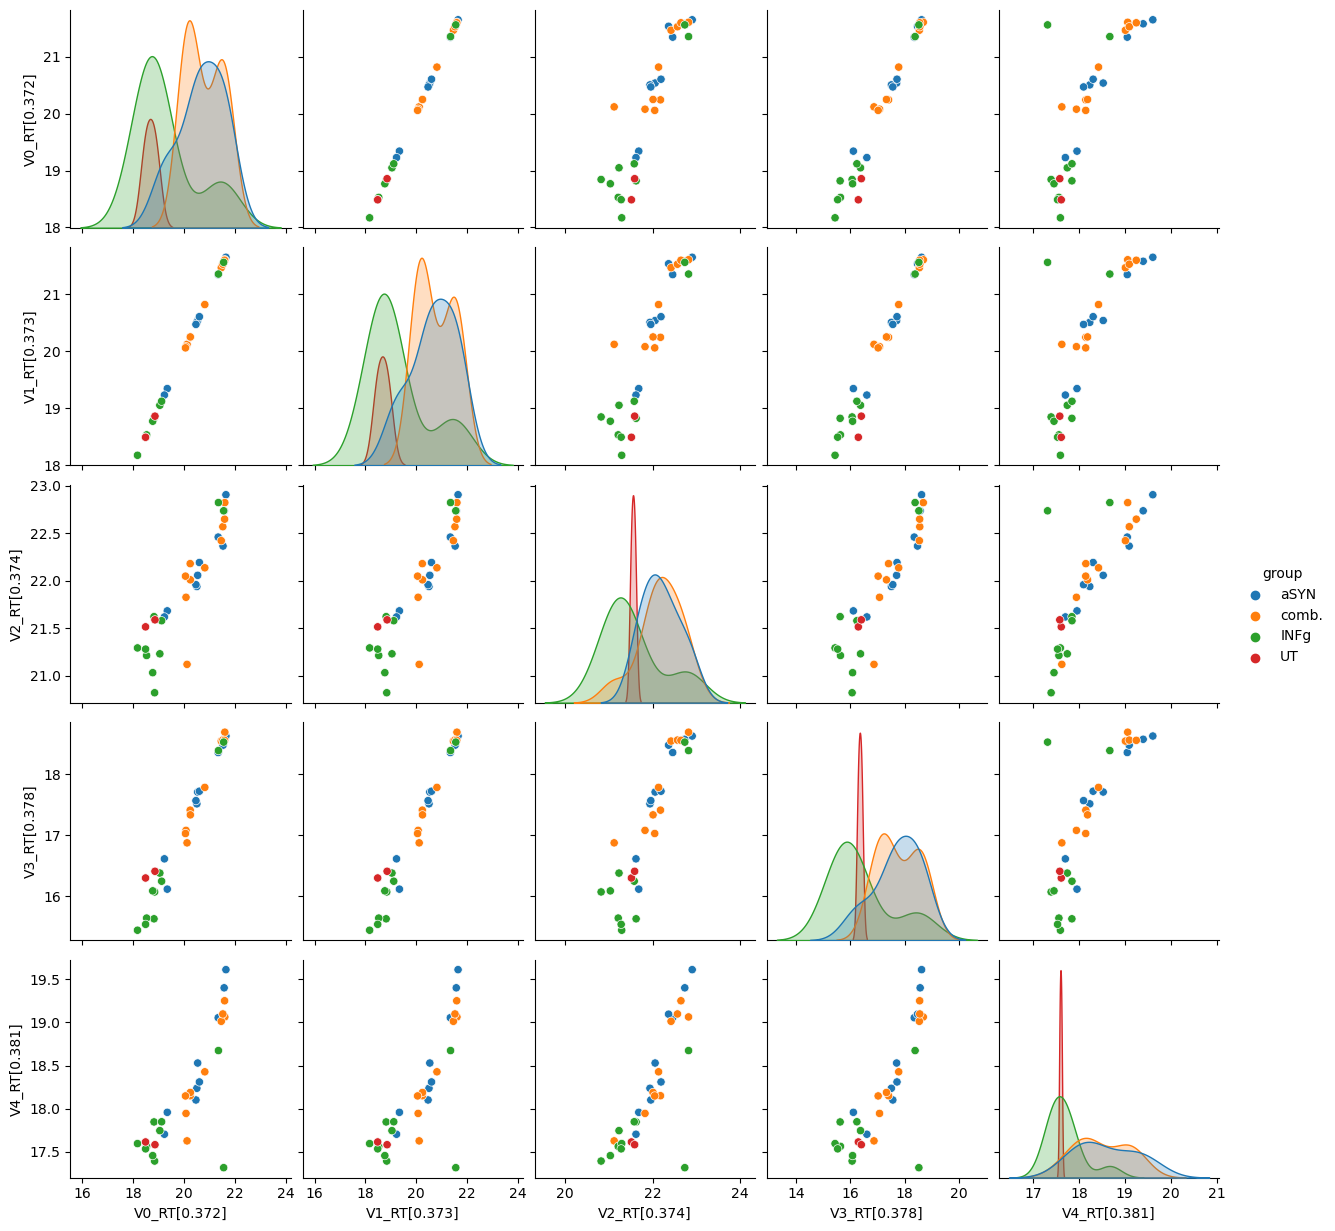

In [146]:
complete_pairplot(X[:,cols], groups, feature_ids)

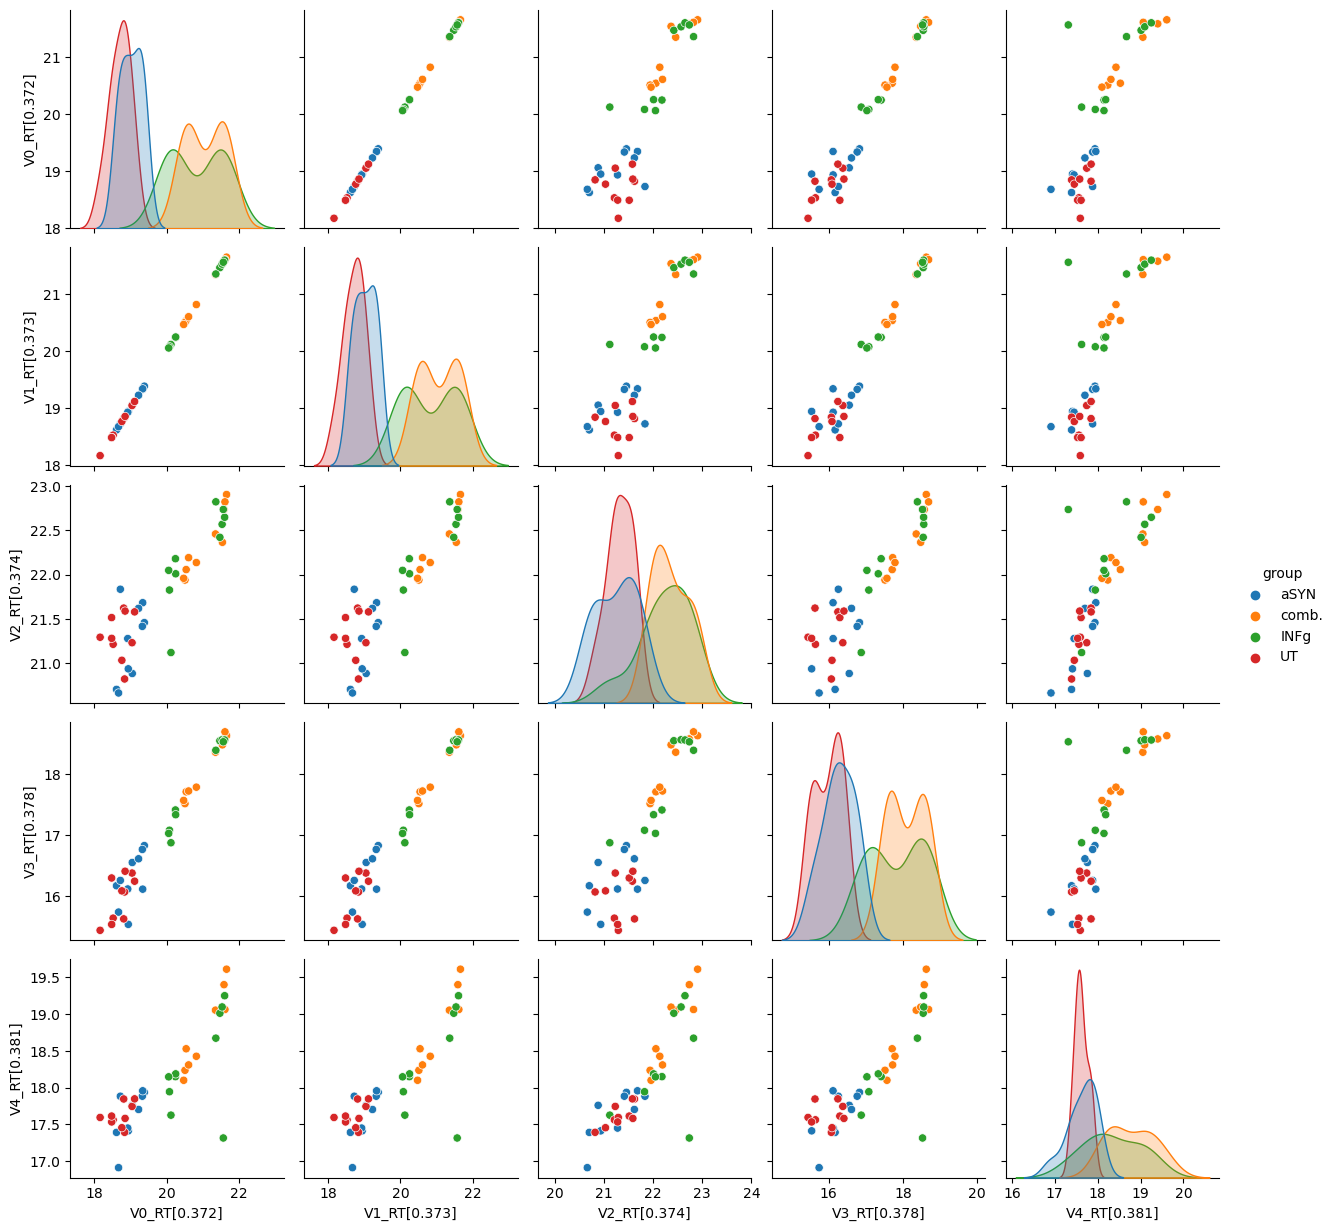

In [17]:
df_X = pd.DataFrame(X[:,cols], columns = ["V{}_RT{}".format(i,val) for i,val in enumerate(rtime[cols])])
df_X['group'] = groups.to_numpy(dtype=str)
complete_pairplot(df_X, group_col='group')

### ---------------------------------------------------------

### Plasma

In [36]:
data_X=data_significant.iloc[sorted_ind+4,:80]
X=data_significant.iloc[sorted_ind+4,8:80].to_numpy(dtype=float).T
times = data_significant.iloc[sorted_ind+4,5].to_numpy(dtype=float)

### Cell

In [34]:
data_X=data_significant.iloc[sorted_ind+3,:48]
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
times = data_significant.iloc[sorted_ind+3,5].to_numpy(dtype=float)

### Correlation distance (experimental)

In [50]:
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(X)
cov_mat_sample =np.cov(X.T, ddof=1)

In [51]:
COR = np.cov(X_std.T, ddof=0)
title='Correlation matrix'

In [16]:
COR = cov_mat_sample
title='Sample covariance'

In [533]:
COR =graphical_lasso(cov_mat_sample, .5, mode='lars', eps=4)[0]
title='Graphical lasso est'

In [554]:
COR = ledoit_wolf(X, assume_centered=False)[0]
title='Ledoit Wolfe est'

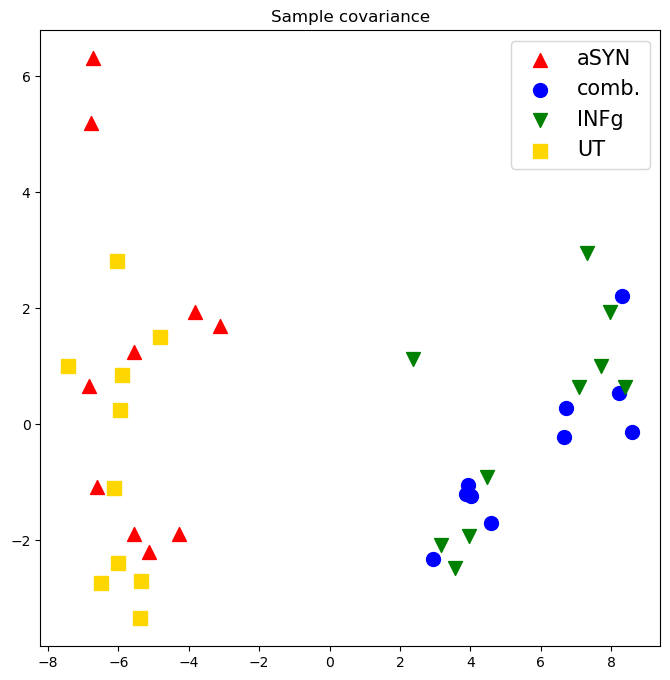

In [17]:
vals, vecs=np.linalg.eig(COR)
pca=X_std@vecs[:,:2]
k=1
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(pca[:10,0],pca[:10,k], marker='^', c='red', s=100)
ax.scatter(pca[10:20,0],pca[10:20,k], marker='o', c='blue', s=100)
ax.scatter(pca[20:30,0],pca[20:30,k], marker='v', c='green', s=100)
ax.scatter(pca[30:,0],pca[30:,k], marker='s', c='gold', s=100)
ax.legend(['aSYN','comb.','INFg','UT'], fontsize=15)
plt.title(title)
plt.show()

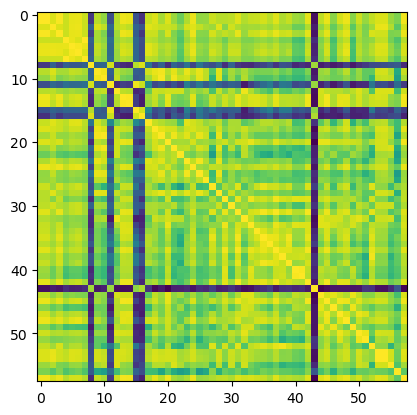

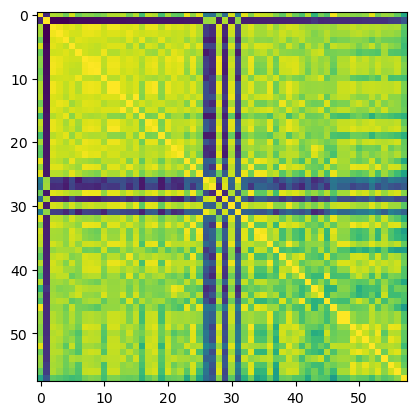

In [20]:
plt.imshow(COR)
plt.show()
plt.imshow(VAT(COR))

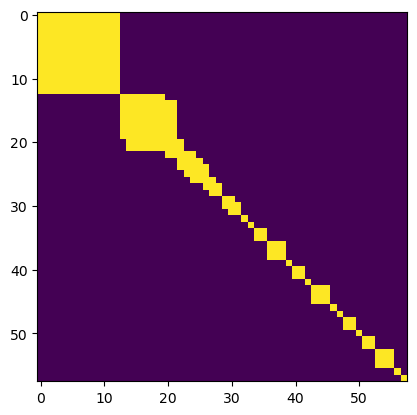

In [557]:
# make a mask matrix by zeroing out all features whose times are not within dt=0.1 of each other
dt = 0.1
D_times = times[:,np.newaxis]-times[np.newaxis,:]
mask = np.abs(D_times) <= dt
plt.imshow(mask)

In [37]:
# Make a distance matrix from the correlation matrix COR
mask = np.ones_like(COR) # can also use the distance mask
CD = 1 - mask*COR
# make sure the diagonal is zero and the matrix is PD
CD = np.maximum(CD, CD.T)
CD -= np.diag(CD.diagonal())
CD=np.clip(CD,0,2)
cd_matrix = squareform(CD,force='tovector')

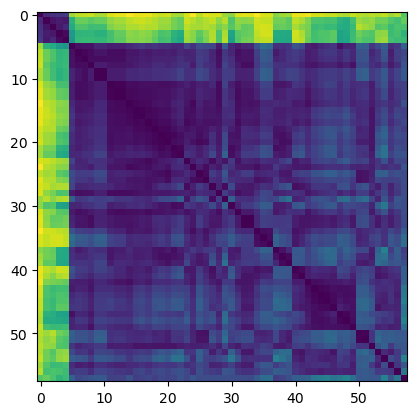

In [22]:
plt.imshow(VAT(CD))

In [38]:
cd_matrix.shape

(1653,)

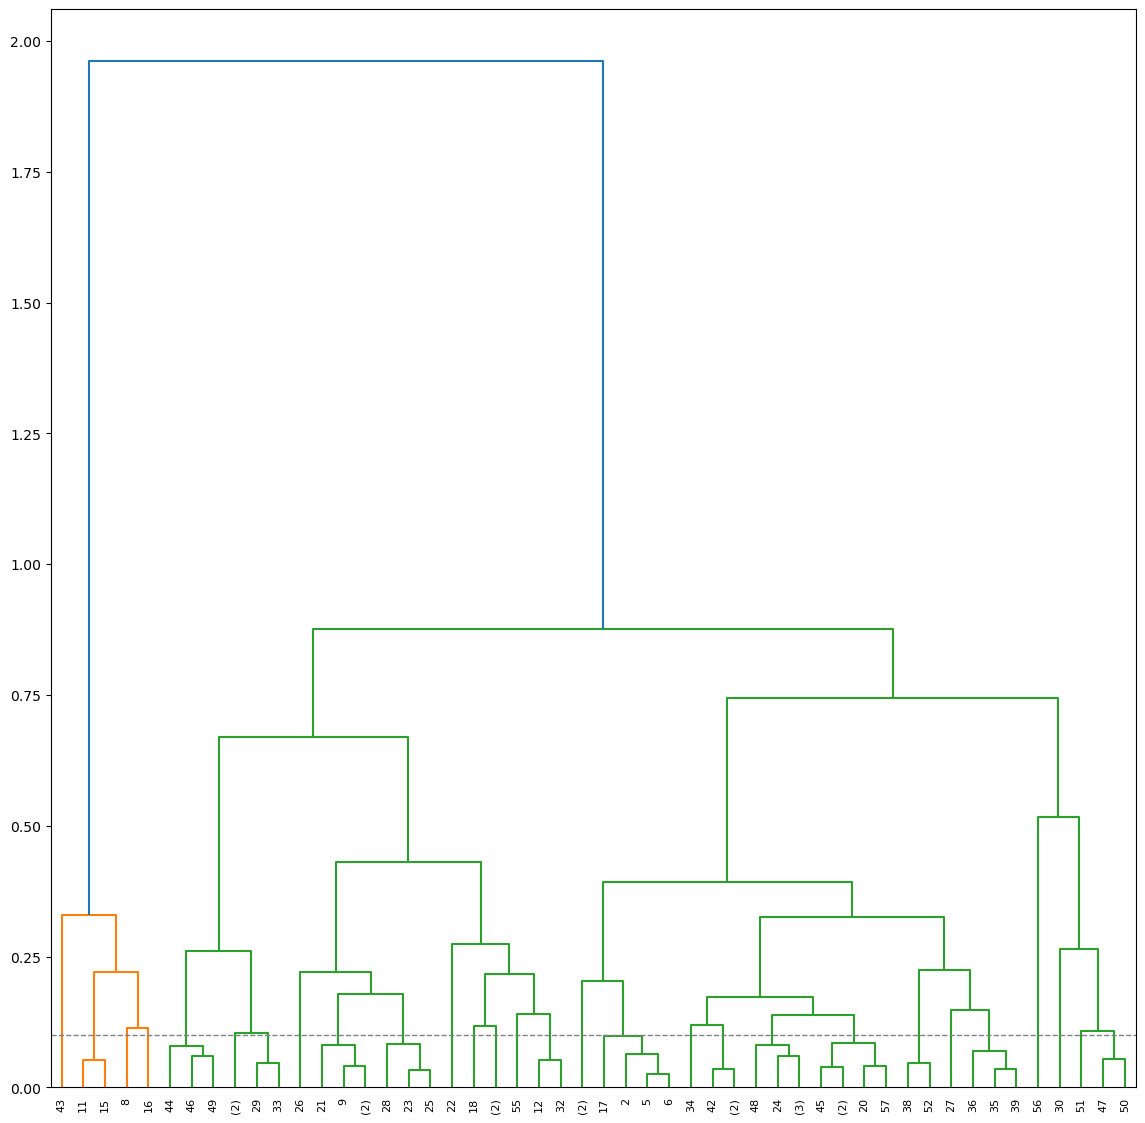

In [52]:
th=0.1
plt.figure(figsize=(14,14))
link_complete = hierarchy.linkage(cd_matrix, method='complete',  optimal_ordering=False)
hierarchy.dendrogram(link_complete, truncate_mode='lastp', p=50, labels=np.asarray(np.arange(CD.shape[0])))
plt.axhline(y=th, c='grey', lw=1, linestyle='dashed')
labels_complete=hierarchy.fcluster(link_complete, t=th, criterion='distance')

In [53]:
labels_complete

array([20, 20, 17, 20, 16, 17, 17, 16,  2,  8,  8,  1, 13, 21, 21,  1,  3,
       17, 12,  8, 21,  8, 15,  9, 20,  9, 10, 24,  9,  7, 27, 18, 13,  7,
       19, 23, 23, 18, 22, 23,  6,  6, 18,  4,  5, 21,  5, 25, 20,  5, 25,
       26, 22, 11, 11, 14, 28, 21], dtype=int32)

In [54]:
np.unique(labels_complete).shape

(28,)

In [55]:
inds=np.argsort(labels_complete)
result = data_X.iloc[inds,:]
result['labels_complete']=labels_complete[inds]
luniq=np.unique(labels_complete[inds])

In [56]:
k=luniq[4]
cluster_ind = np.where(labels_complete[inds]==k)[0]
cluster_names = result.iloc[cluster_ind,0].to_numpy(dtype=str)
cluster_times = result.iloc[cluster_ind,5].to_numpy(dtype=float)
cluster_mass = result.iloc[cluster_ind,4].to_numpy(dtype=float)
cluster_masstimes = ["{}@{}".format(m,t) for m,t in zip(cluster_mass,cluster_times)]

# CELL
cluster = result.iloc[cluster_ind,8:48].to_numpy(dtype=float).T
# PLASMA
#cluster = result.iloc[cluster_ind,8:80].to_numpy(dtype=float).T

df_cluster = pd.DataFrame(cluster, columns = cluster_masstimes)
df_cluster['group']=groups.to_numpy(dtype=str)
print(cluster_times)

[4.045 4.64  5.123]


In [40]:
#complete_pairplot(df_cluster.iloc[:,:-1].to_numpy(dtype=float), group_col=gender, kind='kde', palette=None)

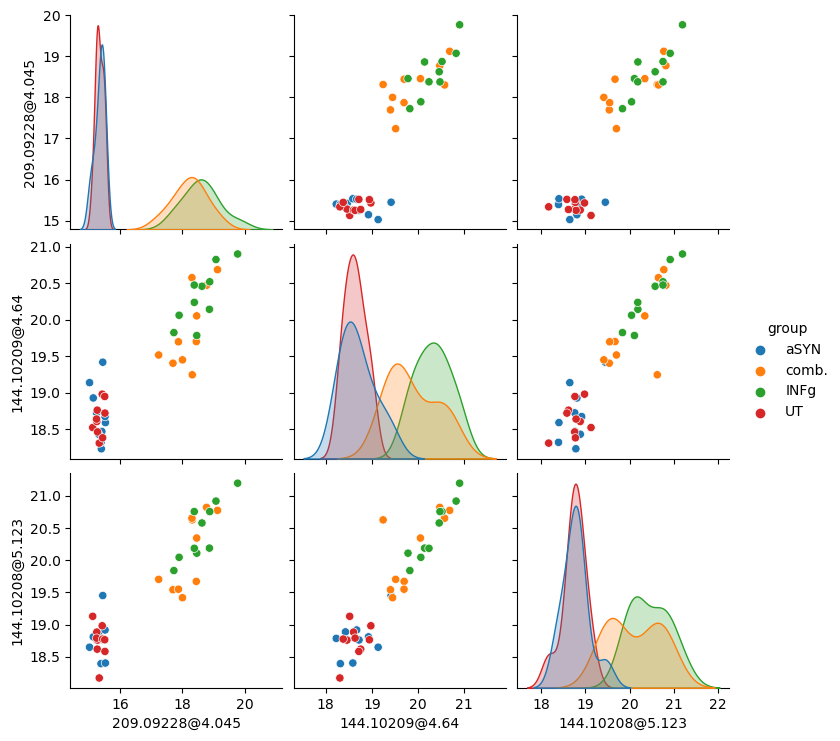

In [28]:
complete_pairplot(df_cluster, group_col='group', kind='kde', palette=None)

In [44]:
cluster_names

array(['Kynurenine', 'Stachydrine', '1-Aminocyclohexanecarboxylic acid'],
      dtype='<U33')

In [45]:
cluster_masstimes

['209.09228@4.045', '144.10209@4.64', '144.10208@5.123']

### Check the pvalues and tests for each peak (id'd by masstime)

In [31]:
mts, ps, ts, es = extract_pvalues(df_select,cluster_masstimes, pvalue_col=' p_FDR',head='')
tle = fname + "\ncluster ID: {}".format(k)
display_pvalues(mts, ps, ts, es, tle)

cellshilicposALPHA0.05FC1.0MINVAR0.125.csv
cluster ID: 5
-----------------------
Peak: 209.09228@4.045
P-values: [6e-06, 6e-06, 1e-05, 8e-06]
Tests: ['aSYN--comb.', 'aSYN--INFg', 'comb.--UT', 'INFg--UT']
Effects: [-2.87932, -3.261433, 2.882216, 3.264328]
-----------------------
Peak: 144.10209@4.64
P-values: [0.004474, 1e-05, 0.002967, 5e-06]
Tests: ['aSYN--comb.', 'aSYN--INFg', 'comb.--UT', 'INFg--UT']
Effects: [-1.188941, -1.632026, 1.248197, 1.691282]
-----------------------
Peak: 144.10208@5.123
P-values: [0.003397, 1.8e-05, 0.002927, 1.8e-05]
Tests: ['aSYN--comb.', 'aSYN--INFg', 'comb.--UT', 'INFg--UT']
Effects: [-1.327142, -1.673992, 1.363784, 1.710634]


### KMeans

In [4]:
from numba import njit, prange

@njit(parallel=True)
def kmeans(X, k, n_iter, init_centroids):
    #Fast parallel kmeans
    #Original implementation from old numba examples (here slightly modified)
    N = X.shape[0]
    D = X.shape[1]
    centroids = init_centroids
    
    for l in range(n_iter):
        dist = np.array([[np.sqrt(np.sum((X[i, :] - centroids[j, :])**2))
                                for j in range(k)] for i in range(N)])

        predictions = np.array([dist[i, :].argmin() for i in range(N)])
            
        centroids = np.array([[np.sum(X[predictions == i, j])/np.sum(predictions == i)
                                 for j in range(D)] for i in range(k)])

    return centroids, dist, predictions




@njit(parallel=True)
def kmeans_spherical(X, k, n_iter, init_centroids):
    #Fast parallel spherical kmeans
    #Original implementation from old numba examples (here slightly modified)
    
    N = X.shape[0]
    D = X.shape[1]
    centroids = init_centroids
    
    for i in range(centroids.shape[0]):
        centroids[i,:] = centroids[i,:]/np.sqrt(centroids[i,:]@centroids[i,:])
    
    for l in range(n_iter):
        dist = 1 - X@centroids.T
        
        predictions = np.array([dist[i, :].argmin() for i in range(N)])
            
        centroids = np.array([[np.sum(X[predictions == i, j])/np.sum(predictions == i)
                                 for j in range(D)] for i in range(k)])
        
        for i in range(centroids.shape[0]):
            centroids[i,:] = centroids[i,:]/np.sqrt(centroids[i,:]@centroids[i,:])

    return centroids, dist, predictions


In [5]:
x=X_std.T
K=13
xinit=x[np.random.choice(range(x.shape[0]),K),:]

NameError: name 'X_std' is not defined

In [30]:
xinit.shape

(13, 40)

In [3]:
centroids, dist, predictions = kmeans_spherical(x, K, 1000, xinit)

NameError: name 'kmeans_spherical' is not defined

In [2]:
centroids

NameError: name 'centroids' is not defined

### Latent indexing

In [75]:
def get_latents(model, names, topics=None, n_top_words=10):
    word_dict = {}
    if topics is None:
        topics = ['Topic{}'.format(str(i)) for i in range(model.components_.shape[0])]
    feature_names = names
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        #top_features_ind = np.flip(top_features_ind)
        top_features = [feature_names[i] for i in top_features_ind]
        word_dict[topics[topic_idx]] = top_features

    return pd.DataFrame(word_dict)

def get_latents_from_components(components, names, topics=None, n_top_words=10):
    word_dict = {}
    if topics is None:
        topics = ['Topic{}'.format(str(i)) for i in range(components.shape[0])]
    feature_names = names
    for topic_idx, topic in enumerate(components):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        #top_features_ind = np.flip(top_features_ind)
        top_features = [feature_names[i] for i in top_features_ind]
        word_dict[topics[topic_idx]] = top_features

    return pd.DataFrame(word_dict)


def nn_matrix_factorization(X, U_init, V_init, n_iter=100, tol=1e-5):
    D = X
    U = U_init.copy()
    V = V_init.copy()
    n_u, n_i = D.shape
    K = V.shape[1]
    err = np.ones(n_iter)*np.inf
    for step in range(n_iter):
        #update V
        DtU = D.T@U
        VUtU = V@U.T@U
        V *= DtU / VUtU
        #update U
        DV = D@V
        UVtV = U@V.T@V
        U *= DV / UVtV
        # compute error
        #err[step] = np.linalg.norm(D-U@V.T, 'fro')
        err[step] = np.sqrt(((D-U@V.T)**2).sum())
        if err[step-1] - err[step] < tol:
            err = err[:step]
            print("Stop at step {}".format(step))
            break
    return U,V, err

def matrix_factorization(ratings, U_init, V_init, n_iter=100, alpha=0.0002, beta=0.02, tol=1e-5):
    '''
    D: rating matrix
    U: #users x latent_dims
    V: #items x latent_dims
    alpha: learning rate
    beta: regularization parameter'''
    D = ratings
    U = U_init.copy()
    V = V_init.copy().T
    n_u, n_i = D.shape
    err = np.ones(n_iter)*np.inf
    
    for step in range(n_iter):
        
        for inner_step in range(10):
            for i in range(n_u):
                e_i = D[i,:] - np.dot(U[i,:],V)
                U[i,:] = U[i,:] + alpha * (2 * e_i[np.newaxis,:] @ V.T - beta * U[i,:])
        for inner_step in range(10):
            for j in range(n_i):
                e_j = D[:,j] - np.dot(U,V[:,j])
                V[:,j] = V[:,j] + alpha * (2 * e_j @ U - beta * V[:,j])
            
        #e = (D - U@V)[np.where(D>0)].reshape(-1)
        #err[step] = np.linalg.norm(e)
        err[step] = np.sqrt(((D-U@V)**2).sum())
        if np.abs(err[step-1] - err[step]) < tol:
            err = err[:step]
            print("Stop at step {}".format(step))
            break
        
    return U, V.T, err

# NNDSVD method, Boutsidis & Gallopoulos, 2007
def nnd_svd_initialization(D,rank):
    u,s,v=np.linalg.svd(D,full_matrices=False)
    v=v.T
    w=np.zeros((D.shape[0],rank))
    h=np.zeros((rank,D.shape[1]))

    w[:,0]=np.sqrt(s[0])*np.abs(u[:,0])
    h[0,:]=np.sqrt(s[0])*np.abs(v[:,0].T)

    for i in range(1,rank):
        
        ui=u[:,i]
        vi=v[:,i]
        ui_pos=(ui>=0)*ui
        ui_neg=(ui<0)*-ui
        vi_pos=(vi>=0)*vi
        vi_neg=(vi<0)*-vi
        
        ui_pos_norm=np.linalg.norm(ui_pos,2)
        ui_neg_norm=np.linalg.norm(ui_neg,2)
        vi_pos_norm=np.linalg.norm(vi_pos,2)
        vi_neg_norm=np.linalg.norm(vi_neg,2)
        
        norm_pos=ui_pos_norm*vi_pos_norm
        norm_neg=ui_neg_norm*vi_neg_norm
        
        if norm_pos>=norm_neg:
            w[:,i]=np.sqrt(s[i]*norm_pos)/ui_pos_norm*ui_pos
            h[i,:]=np.sqrt(s[i]*norm_pos)/vi_pos_norm*vi_pos.T
        else:
            w[:,i]=np.sqrt(s[i]*norm_neg)/ui_neg_norm*ui_neg
            h[i,:]=np.sqrt(s[i]*norm_neg)/vi_neg_norm*vi_neg.T

    return w,h.T

In [60]:
colnames=['labels']
#plasma
#colnames.extend(list(data.iloc[3,:8]))
#cell
colnames.extend(list(data.iloc[2,:8]))
colnames.extend(list(groups))
data_with_labels = data_X.copy()
data_with_labels.insert(0, 'labels', labels_complete)
data_with_labels.columns=colnames
data_with_labels.head(2)

,labels,Name,Formula,Annot. DeltaMass [ppm],Calc. MW,m/z,RT [min],MS2,Reference Ion,aSYN,...,UT,UT,UT,UT,UT,UT,UT,UT,UT,UT
94,20,NaN,C30 H57 N O4,-0.07,495.42873,496.436,0.372,No MS2,[M+H]+1,19.054911837856597,...,19.0486843730563,18.819158135746495,18.52823607801731,18.84331525406912,18.169228067048167,18.767897207329106,18.487820149876427,19.119022159067182,18.486052633625206,18.856978690609473
106,20,NaN,C30 H54 O4,-0.21,478.40211,496.436,0.373,No MS2,[M+NH4]+1,19.054911837856597,...,19.0486843730563,18.819158135746495,18.52823607801731,18.84331525406912,18.169228067048167,18.767897207329106,18.487820149876427,19.119022159067182,18.486052633625206,18.856978690609473


In [66]:
features = data_with_labels.iloc[:,9:].to_numpy(dtype=float).T

In [73]:
# features = obs x compounds ~ abs x latents x (features x latents).T
lsi_model = TruncatedSVD(n_components=4).fit(features)
lsi_features = lsi_model.transform(features)
lsi_model_left = TruncatedSVD(n_components=4).fit(features.T)
lsi_features_left = lsi_model_left.transform(features.T)

Stop at step 378


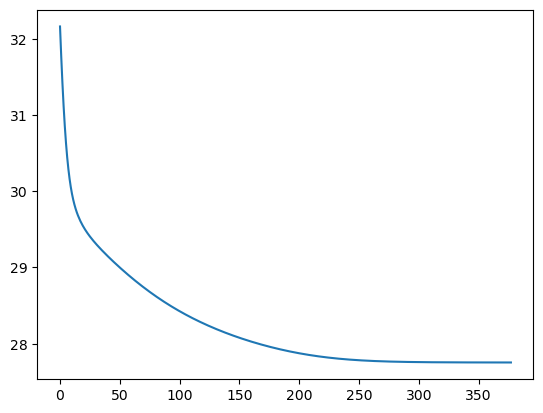

In [127]:
U_init, V_init = nnd_svd_initialization(features,2)
U, V, err = nn_matrix_factorization(features, U_init, V_init, n_iter=1000)
plt.plot(err)

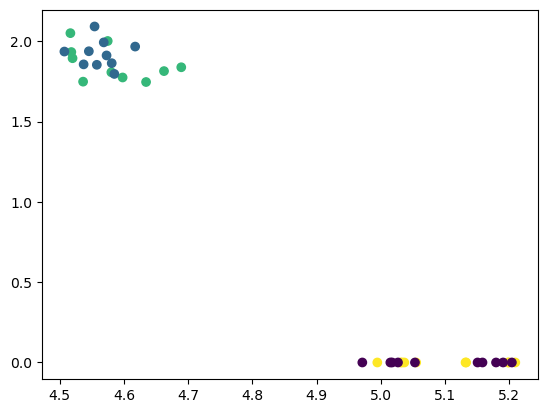

In [128]:
plt.scatter(U[:,0],U[:,1], c=LabelEncoder().fit_transform(groups))

In [132]:
topics=get_latents_from_components(V.T, labels_complete, n_top_words=20)
#get_latents_from_components(U.T, np.asarray(groups), n_top_words=20)
topics

,Topic0,Topic1
0,23,4
1,6,1
2,25,1
3,7,3
4,11,2
5,7,6
6,22,7
7,9,7
8,26,26
9,21,23


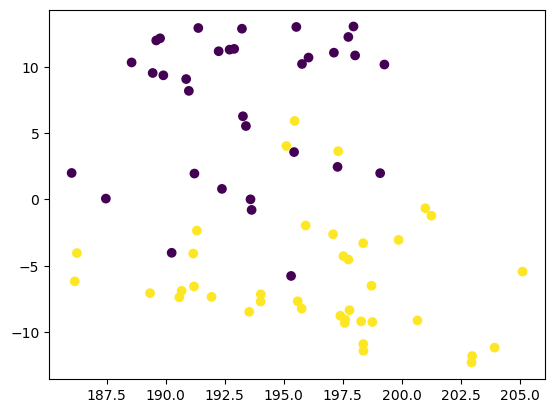

In [127]:
plt.scatter(lsi_features[:,0],lsi_features[:,1], c=LabelEncoder().fit_transform(groups))

In [79]:
topics=get_latents(lsi_model, labels_complete, n_top_words=20)
topics

NameError: name 'lsi_model' is not defined

In [134]:
np.sort(topics['Topic0'])

array([ 5,  5,  6,  7,  7, 12, 19, 21, 28, 29, 33, 34, 37, 38, 39, 39, 40,
       47, 57, 75])

In [135]:
np.sort(topics['Topic1'])

array([ 1,  1,  2,  4,  6,  6,  7,  7, 12, 12, 12, 12, 13, 14, 15, 16, 17,
       20, 22, 23])

In [90]:
joint_labels = ["{}_{}".format(i,j) for i,j in zip(groups, gender)]

In [131]:
get_latents(lsi_model_left, joint_labels, n_top_words=15)

,Topic0,Topic1,Topic2,Topic3
0,PD_female,Control_male,PD_male,PD_female
1,PD_male,Control_female,PD_female,PD_female
2,PD_female,Control_female,PD_female,PD_male
3,PD_female,Control_male,PD_male,PD_female
4,PD_female,Control_male,PD_male,PD_female
5,PD_male,Control_male,Control_female,PD_female
6,PD_male,Control_male,PD_male,PD_female
7,PD_male,Control_female,PD_male,Control_male
8,Control_female,Control_female,PD_male,Control_female
9,Control_female,Control_female,Control_female,Control_female


## Designs

In [60]:
#pd.get_dummies(groups)

In [61]:
y=df_cluster.iloc[:,0].to_numpy(dtype=float)

In [81]:
X_d=pd.get_dummies(groups).to_numpy()

In [80]:
groups

8      aSYN
9      aSYN
10     aSYN
11     aSYN
12     aSYN
13     aSYN
14     aSYN
15     aSYN
16     aSYN
17     aSYN
18    comb.
19    comb.
20    comb.
21    comb.
22    comb.
23    comb.
24    comb.
25    comb.
26    comb.
27    comb.
28     INFg
29     INFg
30     INFg
31     INFg
32     INFg
33     INFg
34     INFg
35     INFg
36     INFg
37     INFg
38       UT
39       UT
40       UT
41       UT
42       UT
43       UT
44       UT
45       UT
46       UT
47       UT
Name: 0, dtype: object

In [82]:
X_d

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [83]:
β = np.linalg.inv(X_d.T@X_d)@X_d.T@y

In [84]:
β

array([18.69510253, 14.27052887, 14.21026936, 18.15233718])

In [85]:
# 4-way contrast (model for means)
C = np.array(
    [[1,-1,0,0],
     [1,0,-1,0],
     [1,0,0,-1],
     [0,1,-1,0],
     [0,1,0,-1],
     [0,0,1,-1]]
)
C

array([[ 1, -1,  0,  0],
       [ 1,  0, -1,  0],
       [ 1,  0,  0, -1],
       [ 0,  1, -1,  0],
       [ 0,  1,  0, -1],
       [ 0,  0,  1, -1]])

In [86]:
C@β

array([ 4.42457366,  4.48483317,  0.54276535,  0.06025951, -3.88180831,
       -3.94206782])

Effects: [-2.87932, -3.261433, 2.882216, 3.264328]
Effects: [-1.327142, -1.673992, 1.363784, 1.710634]
Effects: [-1.188941, -1.632026, 1.248197, 1.691282]

## ANOVA

In [91]:
from statsmodels.formula.api import ols
from scipy.stats import t

In [92]:
def dof_estimate(x1, x2):
    n1, n2 = len(x1), len(x2)
    s1, s2 = x1.var(ddof=1)/n1, x2.var(ddof=1)/n2

    return (s1 + s2)**2 / (s1**2/(n1-1) + s2**2/(n2-1))
    
def t_stat(x1,x2):
    n1, n2 = len(x1), len(x2)
    m1, m2 = x1.mean(), x2.mean()
    s1, s2 = x1.var(ddof=1)/n1, x2.var(ddof=1)/n2
    
    return (m1 - m2) / np.sqrt(s1 + s2)

def t_test(x1, x2):
    # p-value for 2-sided test
    tstat = t_stat(x1, x2)
    dof = dof_estimate(x1,x2)
    
    return 2*(1 - t.cdf(abs(tstat), dof)), tstat, dof

In [135]:
data =data_significant.iloc[sorted_ind+3,:] 
X=data.iloc[:,8:48].to_numpy(dtype=float).T

In [147]:
k=1
#design = make_oneWay_design(groups)
M=X_d
inds=np.array([i for i in range(40) if i not in range(10,30)])
#inds = np.arange(20)
ydata=X[inds,k]

In [137]:
groups.iloc[inds]

8     aSYN
9     aSYN
10    aSYN
11    aSYN
12    aSYN
13    aSYN
14    aSYN
15    aSYN
16    aSYN
17    aSYN
38      UT
39      UT
40      UT
41      UT
42      UT
43      UT
44      UT
45      UT
46      UT
47      UT
Name: 0, dtype: object

In [148]:
t_test(ydata[:10],ydata[10:20])

(0.027417653951613996, 2.400165828131651, 17.999818111639314)

In [149]:
M[:,2]=1
M=M[:20,2:]
M

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=uint8)

In [150]:
β = np.linalg.inv(M.T@M)@M.T@ydata

In [151]:
β

array([19.02438486, -0.31174559])

In [152]:
xdata

,area,group
0,13.660161,2.0
1,13.748243,2.0
2,16.495965,2.0
3,16.126290,2.0
4,15.960166,2.0
5,16.171138,2.0
6,15.622260,2.0
7,15.346693,2.0
8,16.469351,2.0
9,16.131494,2.0


In [156]:
print(data.iloc[k,0])
xdata = pd.DataFrame(np.hstack((X[inds,k][:,np.newaxis],labels[inds,np.newaxis])), columns=['area','group'])
res = ols(formula="area~1 + group", data=xdata).fit()
res.summary()

nan


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     5.761
Date:                Thu, 29 Jun 2023   Prob (F-statistic):             0.0274
Time:                        23:37:10   Log-Likelihood:                -2.5974
No. Observations:                  20   AIC:                             9.195
Df Residuals:                      18   BIC:                             11.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.4009      0.205     89.600      0.000      17.969      18.832
group          0.3117      0.130      2.400      0.027       0.039       0.585
==============================================================================
Omnibus:                        2.017   Durbin-Watson:                   2.607
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.142
Skew:                          -0.229   Prob(JB):                        0.565
Kurtosis:                       1.923   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
res.tvalues

C(group)[0.0]    85.574404
C(group)[1.0]    79.604158
C(group)[2.0]    77.699851
C(group)[3.0]    86.891238
dtype: float64

In [216]:
I1=np.ones((3,1))
I2=np.ones((3,1))
I3=np.ones((2,1))
I4=np.ones((4,1))
Z=np.zeros((12,1))

In [84]:
M=np.array([[1,0,1,0],[1,0,0,0],[1,1,1,1],[1,1,0,0]])
M

array([[1, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 0, 0]])

In [85]:
M.T@M

array([[4, 2, 2, 1],
       [2, 2, 1, 1],
       [2, 1, 2, 1],
       [1, 1, 1, 1]])

In [86]:
np.linalg.inv(M.T@M)@M.T

array([[ 0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  1.],
       [ 1., -1.,  0.,  0.],
       [-1.,  1.,  1., -1.]])

In [91]:
M=np.array([[1,0,1,0],[1,0,0,0],[0,1,1,1],[0,1,0,0]])
M

array([[1, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 1, 0, 0]])

In [92]:
np.linalg.inv(M.T@M)@M.T

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1., -1.,  0.,  0.],
       [-1.,  1.,  1., -1.]])

In [87]:
from sympy import *

In [93]:
y1,y2,y3,y4=symbols('y1 y2 y3 y4')

In [94]:
Matrix([[y1],[y2],[y3],[y4]])

Matrix([
[y1],
[y2],
[y3],
[y4]])

In [95]:
np.linalg.inv(M.T@M)@M.T@Matrix([[y1],[y2],[y3],[y4]])

Matrix([
[                            1.0*y2],
[                            1.0*y4],
[                   1.0*y1 - 1.0*y2],
[-1.0*y1 + 1.0*y2 + 1.0*y3 - 1.0*y4]])